In [2]:
import os
import sys

# Go one level up from notebooks/ to project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.config import DATA_RAW
from src.load_data import load_all_data

df = load_all_data(DATA_RAW)


### Importing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Path

In [4]:
df = load_all_data("../data/raw")

In [5]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [7]:
# df.to_csv("../data/processed/dataframe.csv", index=False)

### Basic Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB


In [9]:
df.describe()

,TRANSACTION_ID,TX_DATETIME,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1754155,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,2018-07-01 11:20:33.708572160,5.363230e+01,8.369272e-03,1.882388e-02
min,0.000000e+00,2018-04-01 00:00:31,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,2018-05-16 14:40:46.500000,2.101000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,2018-07-01 11:11:10,4.464000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,2018-08-16 08:01:01.500000,7.695000e+01,0.000000e+00,0.000000e+00
max,1.754154e+06,2018-09-30 23:59:57,2.628000e+03,1.000000e+00,3.000000e+00
std,5.063811e+05,NaN,4.232649e+01,9.110012e-02,2.113263e-01


In [10]:
# Fraud distribution
print(df['TX_FRAUD'].value_counts(normalize=True))

TX_FRAUD
0    0.991631
1    0.008369
Name: proportion, dtype: float64


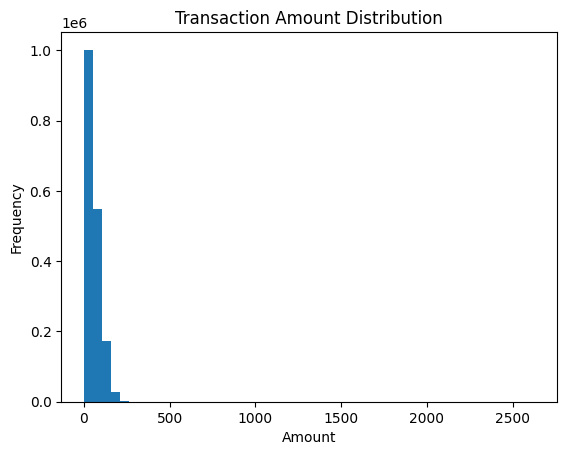

In [11]:
# Amount distribution
plt.hist(df['TX_AMOUNT'], bins=50)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [12]:
# Date parsing
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
print("minimum:",df['TX_DATETIME'].min(),
    "\nmaximum:", df['TX_DATETIME'].max())


minimum: 2018-04-01 00:00:31 
maximum: 2018-09-30 23:59:57


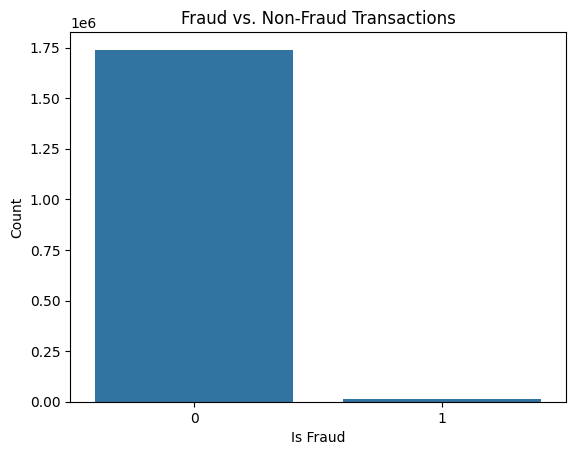

Fraud Rate: 0.84%


In [13]:
import seaborn as sns

# Count of fraud vs. non-fraud
sns.countplot(x='TX_FRAUD', data=df)
plt.title("Fraud vs. Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# Percentage
fraud_rate = df['TX_FRAUD'].value_counts(normalize=True) * 100
print(f"Fraud Rate: {fraud_rate[1]:.2f}%")



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


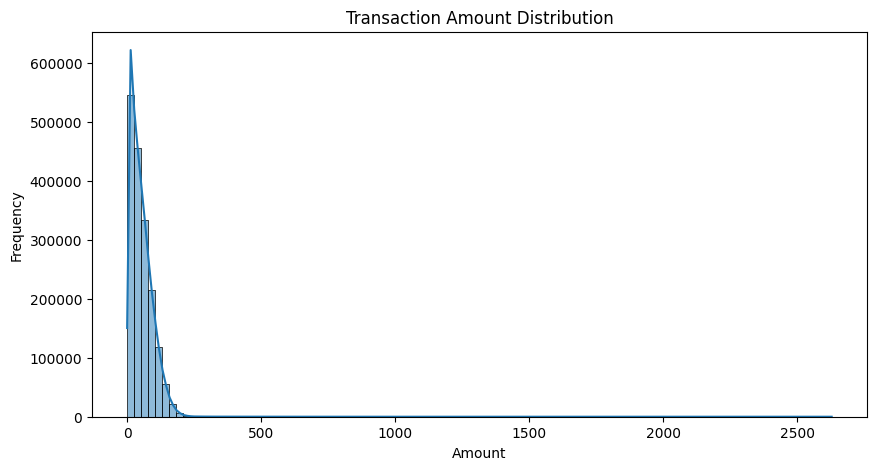

In [14]:
# Histogram of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['TX_AMOUNT'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

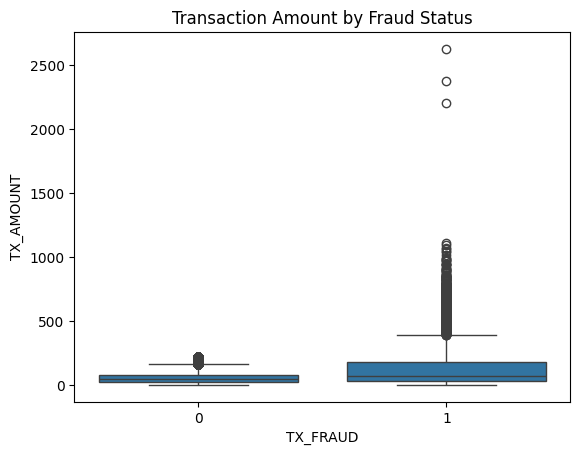

In [15]:
# Boxplot by fraud label
sns.boxplot(x='TX_FRAUD', y='TX_AMOUNT', data=df)
plt.title("Transaction Amount by Fraud Status")
plt.show()

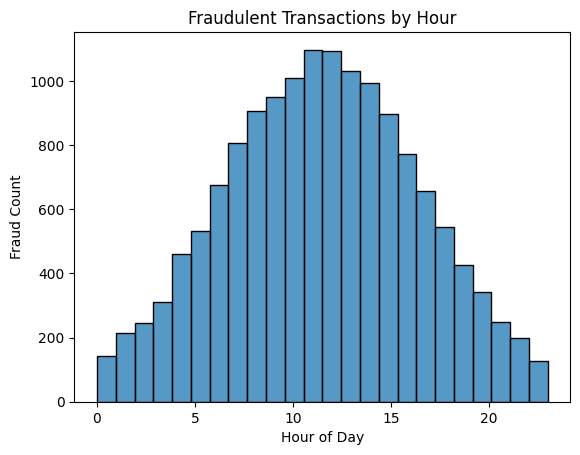

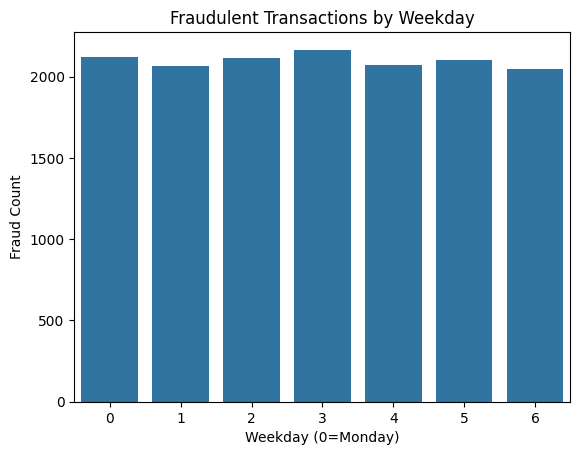

In [16]:
# Extract hour and weekday
df['TX_HOUR'] = df['TX_DATETIME'].dt.hour
df['TX_WEEKDAY'] = df['TX_DATETIME'].dt.weekday

# Fraud by hour
sns.histplot(data=df[df['TX_FRAUD'] == 1], x='TX_HOUR', bins=24)
plt.title("Fraudulent Transactions by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Count")
plt.show()

# Fraud by weekday
sns.countplot(x='TX_WEEKDAY', data=df[df['TX_FRAUD'] == 1])
plt.title("Fraudulent Transactions by Weekday")
plt.xlabel("Weekday (0=Monday)")
plt.ylabel("Fraud Count")
plt.show()


Average transactions per customer: 351.53406813627254


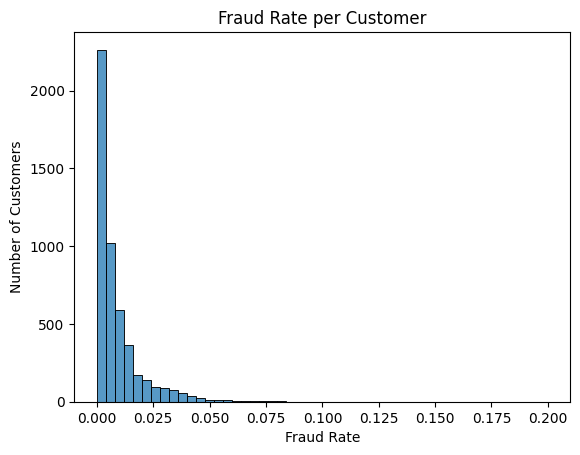

In [17]:
# Transactions per customer
tx_per_customer = df['CUSTOMER_ID'].value_counts()
print("Average transactions per customer:", tx_per_customer.mean())

# Fraud rate per customer
fraud_by_customer = df.groupby('CUSTOMER_ID')['TX_FRAUD'].mean()
sns.histplot(fraud_by_customer, bins=50)
plt.title("Fraud Rate per Customer")
plt.xlabel("Fraud Rate")
plt.ylabel("Number of Customers")
plt.show()


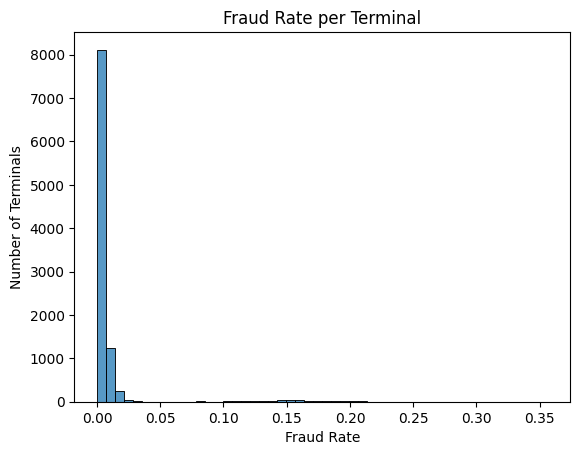

In [18]:
# Fraud rate per terminal
fraud_by_terminal = df.groupby('TERMINAL_ID')['TX_FRAUD'].mean()
sns.histplot(fraud_by_terminal, bins=50)
plt.title("Fraud Rate per Terminal")
plt.xlabel("Fraud Rate")
plt.ylabel("Number of Terminals")
plt.show()

In [19]:
# Scenario 1: Amount > 220
df['is_high_amount'] = df['TX_AMOUNT'] > 220
scenario_1_match = df[(df['is_high_amount']) & (df['TX_FRAUD_SCENARIO'] == 1)]
print(f"Scenario 1 matches: {len(scenario_1_match)}")

# Scenario 2: Terminal-based fraud
scenario_2 = df[df['TX_FRAUD_SCENARIO'] == 2]
top_terminals = scenario_2['TERMINAL_ID'].value_counts().head()
print("Top terminals involved in scenario 2:", top_terminals)

# Scenario 3: Customer-based fraud
scenario_3 = df[df['TX_FRAUD_SCENARIO'] == 3]
top_customers = scenario_3['CUSTOMER_ID'].value_counts().head()
print("Top customers involved in scenario 3:", top_customers)


Scenario 1 matches: 973
Top terminals involved in scenario 2: TERMINAL_ID
293     81
1244    71
3644    58
7054    50
4692    48
Name: count, dtype: int64
Top customers involved in scenario 3: CUSTOMER_ID
27      39
1743    36
3570    36
1692    34
365     34
Name: count, dtype: int64


# **Feature Enggineering**

In [ ]:
from src.feature_engineering import add_high_amount_flag, add_terminal_fraud_count

df = add_high_amount_flag(df)
df = add_terminal_fraud_count(df)


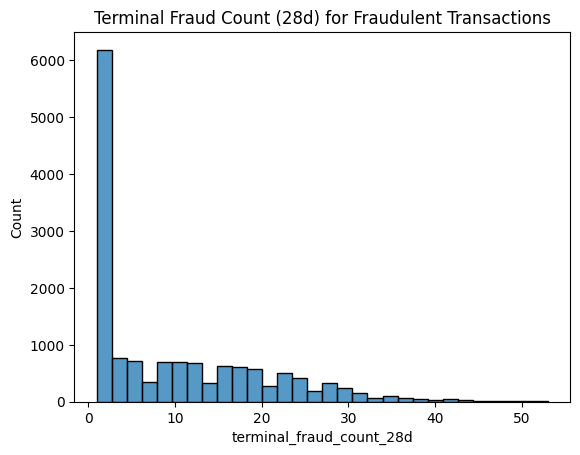

In [29]:

sns.histplot(df[df['TX_FRAUD'] == 1]['terminal_fraud_count_28d'], bins=30)
plt.title("Terminal Fraud Count (28d) for Fraudulent Transactions")
plt.show()


## Save it

In [ ]:
df.to_pickle("../data/processed/df_with_terminal_fraud.pkl")

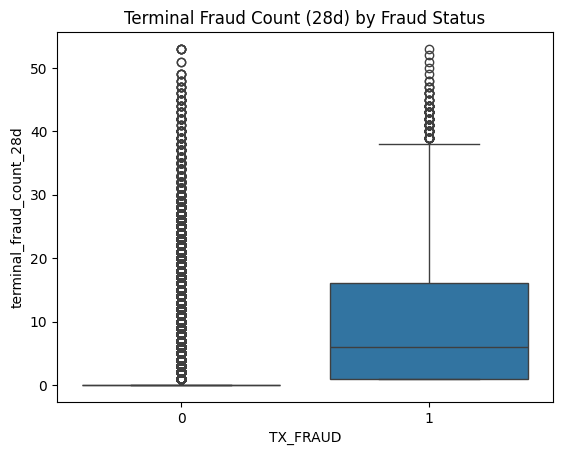

In [30]:
sns.boxplot(x='TX_FRAUD', y='terminal_fraud_count_28d', data=df)
plt.title("Terminal Fraud Count (28d) by Fraud Status")
plt.show()

for others

In [ ]:
from src.feature_engineering import add_customer_avg_amount, add_amount_deviation

# df = add_customer_avg_amount(df)
# df = add_amount_deviation(df)


In [ ]:
df = add_customer_avg_amount(df)
df = add_amount_deviation(df)


In [26]:
df.to_pickle("../data/processed/df_with_customer_features.pkl")


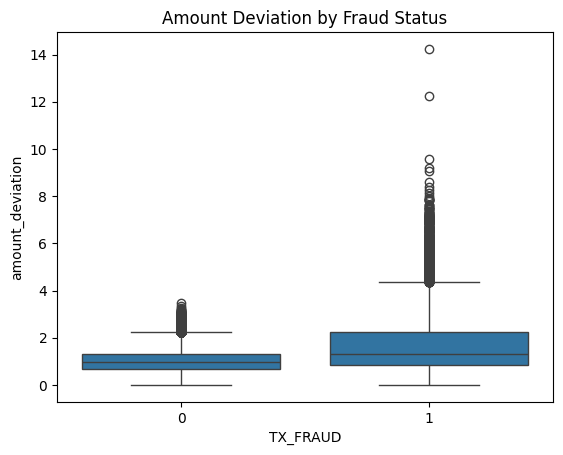

In [27]:
import seaborn as sns

sns.boxplot(x='TX_FRAUD', y='amount_deviation', data=df)
plt.title("Amount Deviation by Fraud Status")
plt.show()


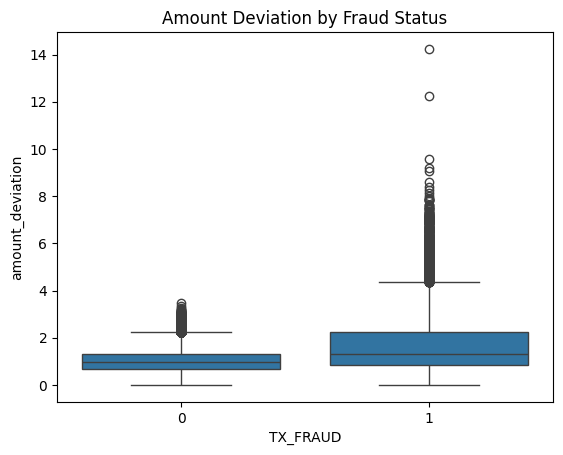

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='TX_FRAUD', y='amount_deviation', data=df)
plt.title("Amount Deviation by Fraud Status")
plt.show()
